In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [64]:
gold_dataset=pd.read_csv('gld_price_data.csv')
x=gold_dataset.iloc[:,1:-1].values
y=gold_dataset.iloc[:,-1].values

In [65]:
gold_dataset.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [93]:
gold_dataset.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [66]:
gold_dataset.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [67]:
gold_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [68]:
gold_dataset.shape

(2290, 6)

In [69]:
df = pd.DataFrame(gold_dataset)
correlation_matrix=df.corr()


<ipython-input-69-cf2dee7edd8c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix=df.corr()


In [70]:
print(correlation_matrix)

              SPX       GLD       USO       SLV   EUR/USD
SPX      1.000000  0.049345 -0.591573 -0.274055 -0.672017
GLD      0.049345  1.000000 -0.186360  0.866632 -0.024375
USO     -0.591573 -0.186360  1.000000  0.167547  0.829317
SLV     -0.274055  0.866632  0.167547  1.000000  0.321631
EUR/USD -0.672017 -0.024375  0.829317  0.321631  1.000000


<Axes: >

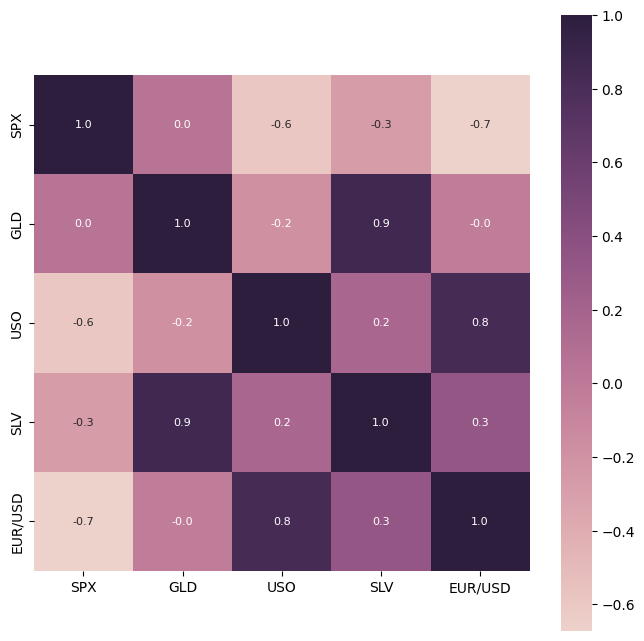

In [81]:
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(correlation_matrix, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap=sns.cubehelix_palette(as_cmap=True))

In [83]:
print(correlation_matrix['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-88-f7224d55be92>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_dataset['GLD'],color='Blue')


<Axes: xlabel='GLD', ylabel='Density'>

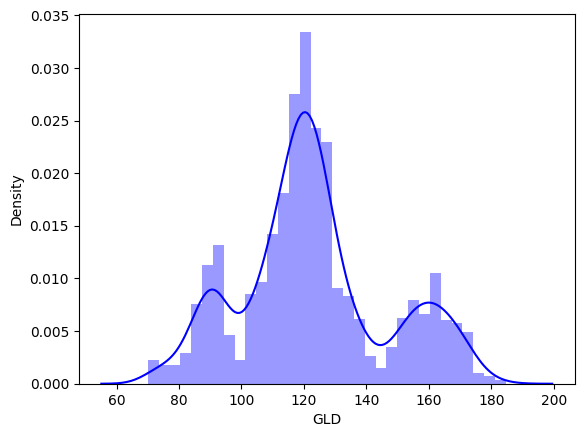

In [88]:
sns.distplot(gold_dataset['GLD'],color='Blue')

In [72]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [73]:
x_train

array([[1165.81,  107.75,   39.56,   16.6 ],
       [1349.99,   89.15,   75.93,   16.95],
       [2041.89,  100.5 ,   10.74,   13.08],
       ...,
       [1283.5 ,  148.34,   36.01,   34.37],
       [1218.28,  167.38,   35.2 ,   32.33],
       [2077.42,  111.98,   19.1 ,   14.9 ]])

In [74]:
x_test

array([[1692.77,  128.79,   36.88,   20.98],
       [2425.53,  115.62,    9.27,   14.99],
       [1309.66,  139.22,   42.05,   36.12],
       ...,
       [1209.88,  159.87,   33.31,   30.23],
       [1089.47,  117.34,   34.74,   17.53],
       [1952.29,  106.38,   14.93,   13.99]])

In [75]:
y_test

array([1.35, 1.15, 1.41, 1.36, 1.56, 1.28, 1.06, 1.36, 1.27, 1.09, 1.07,
       1.11, 1.41, 1.28, 1.16, 1.19, 1.32, 1.39, 1.59, 1.38, 1.45, 1.13,
       1.35, 1.37, 1.41, 1.41, 1.11, 1.31, 1.29, 1.11, 1.05, 1.09, 1.37,
       1.18, 1.46, 1.37, 1.4 , 1.12, 1.25, 1.42, 1.5 , 1.37, 1.35, 1.33,
       1.34, 1.44, 1.18, 1.33, 1.36, 1.23, 1.31, 1.28, 1.39, 1.21, 1.23,
       1.27, 1.08, 1.56, 1.23, 1.11, 1.47, 1.12, 1.34, 1.46, 1.38, 1.35,
       1.23, 1.23, 1.32, 1.16, 1.23, 1.36, 1.28, 1.33, 1.25, 1.11, 1.24,
       1.04, 1.06, 1.33, 1.36, 1.34, 1.28, 1.38, 1.45, 1.31, 1.09, 1.12,
       1.34, 1.52, 1.13, 1.25, 1.33, 1.32, 1.2 , 1.36, 1.57, 1.38, 1.32,
       1.25, 1.25, 1.12, 1.11, 1.13, 1.32, 1.38, 1.33, 1.3 , 1.09, 1.26,
       1.08, 1.38, 1.25, 1.36, 1.58, 1.3 , 1.08, 1.38, 1.29, 1.06, 1.29,
       1.56, 1.26, 1.18, 1.1 , 1.07, 1.27, 1.33, 1.2 , 1.5 , 1.41, 1.11,
       1.27, 1.19, 1.1 , 1.49, 1.26, 1.23, 1.41, 1.24, 1.14, 1.3 , 1.39,
       1.43, 1.29, 1.29, 1.38, 1.18, 1.2 , 1.19, 1.

In [76]:
y_train

array([1.36, 1.47, 1.09, ..., 1.43, 1.39, 1.1 ])

In [77]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10,random_state=0)
regressor.fit(x_train,y_train)
y_pred=regressor.predict(x_test)

In [78]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1.35 1.35]
 [1.14 1.15]
 [1.41 1.41]
 [1.36 1.36]
 [1.57 1.56]
 [1.27 1.28]
 [1.06 1.06]
 [1.34 1.36]
 [1.27 1.27]
 [1.1  1.09]
 [1.07 1.07]
 [1.11 1.11]
 [1.4  1.41]
 [1.28 1.28]
 [1.17 1.16]
 [1.18 1.19]
 [1.31 1.32]
 [1.39 1.39]
 [1.58 1.59]
 [1.37 1.38]
 [1.45 1.45]
 [1.13 1.13]
 [1.36 1.35]
 [1.4  1.37]
 [1.4  1.41]
 [1.41 1.41]
 [1.12 1.11]
 [1.31 1.31]
 [1.3  1.29]
 [1.12 1.11]
 [1.05 1.05]
 [1.09 1.09]
 [1.38 1.37]
 [1.16 1.18]
 [1.47 1.46]
 [1.36 1.37]
 [1.42 1.4 ]
 [1.13 1.12]
 [1.24 1.25]
 [1.41 1.42]
 [1.5  1.5 ]
 [1.36 1.37]
 [1.35 1.35]
 [1.32 1.33]
 [1.35 1.34]
 [1.42 1.44]
 [1.18 1.18]
 [1.36 1.33]
 [1.35 1.36]
 [1.24 1.23]
 [1.31 1.31]
 [1.3  1.28]
 [1.38 1.39]
 [1.22 1.21]
 [1.24 1.23]
 [1.28 1.27]
 [1.11 1.08]
 [1.55 1.56]
 [1.25 1.23]
 [1.08 1.11]
 [1.5  1.47]
 [1.16 1.12]
 [1.38 1.34]
 [1.46 1.46]
 [1.37 1.38]
 [1.35 1.35]
 [1.23 1.23]
 [1.25 1.23]
 [1.31 1.32]
 [1.17 1.16]
 [1.23 1.23]
 [1.4  1.36]
 [1.28 1.28]
 [1.36 1.33]
 [1.26 1.25]
 [1.11 1.11]
 [1.24 1.24]

In [79]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.9755404154146976


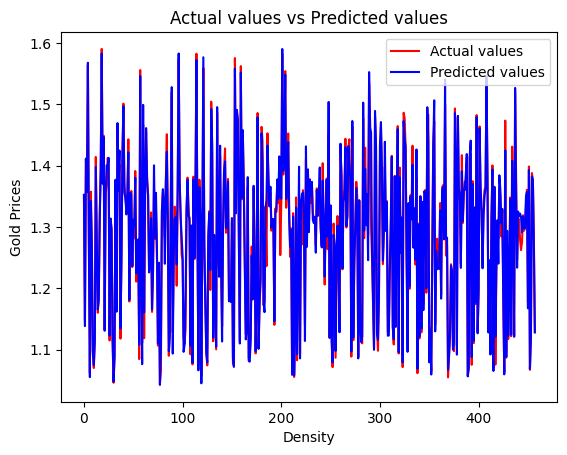

In [92]:
y_test=list(y_test)
plt.plot(y_test,color='red',label='Actual values')
plt.plot(y_pred,color='blue',label='Predicted values')
plt.title('Actual values vs Predicted values')
plt.ylabel('Gold Prices')
plt.xlabel('Density')
plt.legend()
plt.show()
